In [1]:
import numpy as np
import json

In [2]:
dir_1 = '/home/jzh/Dropbox/tsp_rev_refs/figs/'

In [3]:
N_list = [2, 3, 4, 5, 6, 7, 8]
beta_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]
k_list = range(21)[1:]

save_data_dict = {}

for N in N_list:
    for beta in beta_list:
        for k in k_list:
            with open(dir_1 + 'eta_KL_mb_N_%s_beta_%s_k_%s.json'%(N, beta, k), 'r') as json_file:
                save_data_dict[(N, beta, k)] = json.load(json_file)

In [4]:
save_data_dict[(2, 0.1, 1)]

{u'N': 2,
 u'beta': 0.1,
 u'eta_Sanov': [0.2878231366242557,
  0.25584278811044947,
  0.23025850929940456,
  0.20932591754491323,
  0.19188209108283713,
  0.1771219302303112,
  0.16447036378528895,
  0.1535056728662697,
  0.14391156831212784,
  0.1354461819408262,
  0.12792139405522474,
  0.12118868910494976,
  0.11512925464970228,
  0.10964690919019264,
  0.10466295877245661,
  0.10011239534756719,
  0.09594104554141857,
  0.09210340371976182,
  0.0885609651151556,
  0.08528092937014983,
  0.08223518189264448],
 u'eta_actual': [0.2817996490091319,
  0.18871950897508696,
  0.1652909667153569,
  0.16356727869408244,
  0.17721779320739103,
  0.18947073717327456,
  0.1114380785402305,
  0.10979563762146041,
  0.11207915097409538,
  0.12190109704910952,
  0.1312029925175002,
  0.12646336164763763,
  0.09183000762561953,
  0.09093419955066111,
  0.09818984332716664,
  0.1025608404528883,
  0.08114971912827706,
  0.07976027719602531,
  0.08608470003189521,
  0.08537914435105637,
  0.07646333

In [5]:
err_sv_dict = {}
err_wc_1_dict = {}
err_wc_2_dict = {}

for N in N_list:
    for beta in beta_list:
        for n_idx in xrange(len(save_data_dict[(N, beta, 1)]['n_range'])):
            assert(len(save_data_dict[(N, beta, 1)]['n_range']) == \
                   len(save_data_dict[(N, beta, 1)]['eta_Sanov']))
            len_eta_lis = len(save_data_dict[(N, beta, 1)]['eta_Sanov'])
            n = save_data_dict[(N, beta, 1)]['n_range'][n_idx]
            err_sv_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_Sanov'][n_idx] - \
                                                  save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                 for k in k_list])
            err_wc_1_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_1'][n_idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                   for k in k_list])
            err_wc_2_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_2'][n_idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                   for k in k_list])

In [6]:
err_sv_dict

{(8, 1e-05, 2): 0.56955500118654168,
 (8, 0.0001, 2): 0.23955566678824231,
 (8, 0.001, 2): 0.066527588031151552,
 (8, 0.01, 2): 0.048725321642014742,
 (8, 0.1, 2): 0.027752181023076149,
 (9, 1e-05, 2): 0.41895439946906327,
 (9, 0.0001, 2): 0.14243212391944837,
 (9, 0.001, 2): 0.037354292937723507,
 (9, 0.01, 2): 0.032194357824719411,
 (9, 0.1, 2): 0.025484982158358583,
 (10, 1e-05, 2): 0.2818271946088613,
 (10, 0.0001, 2): 0.089427633129890341,
 (10, 0.001, 2): 0.025969894538670581,
 (10, 0.01, 2): 0.025220189482079037,
 (10, 0.1, 2): 0.019766457603744694,
 (11, 1e-05, 2): 0.24169940166551407,
 (11, 0.0001, 2): 0.081511878258199721,
 (11, 0.001, 2): 0.017187673323970868,
 (11, 0.01, 2): 0.02404271603648683,
 (11, 0.1, 2): 0.015666402496096476,
 (12, 1e-05, 2): 0.14625457483251561,
 (12, 0.0001, 2): 0.059862199212553077,
 (12, 0.001, 2): 0.011415525014783903,
 (12, 0.01, 2): 0.012999860899501742,
 (12, 0.1, 2): 0.014483349731217501,
 (13, 1e-05, 2): 0.14709236524269231,
 (13, 0.0001, 2)

In [7]:
%matplotlib inline

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


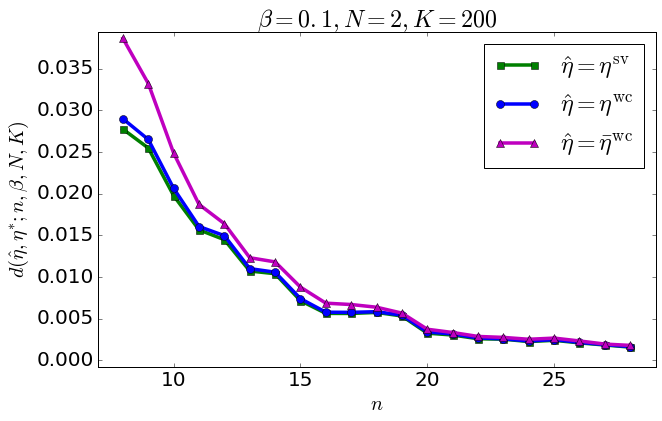

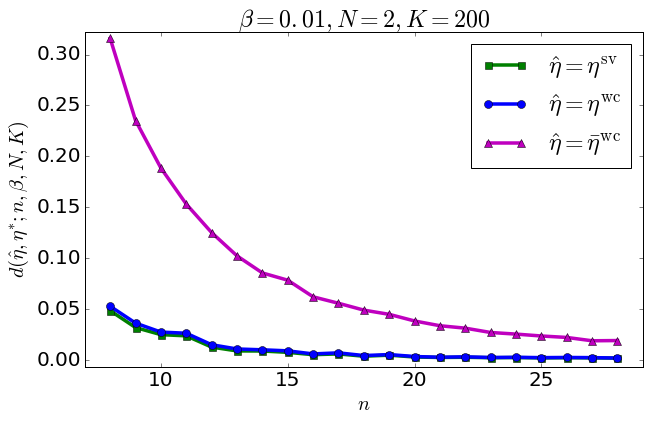

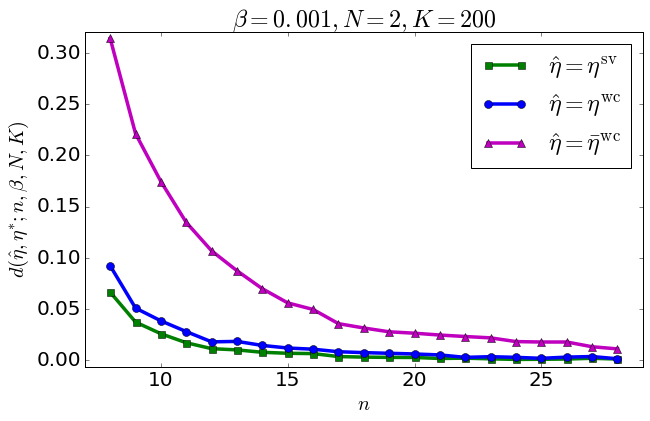

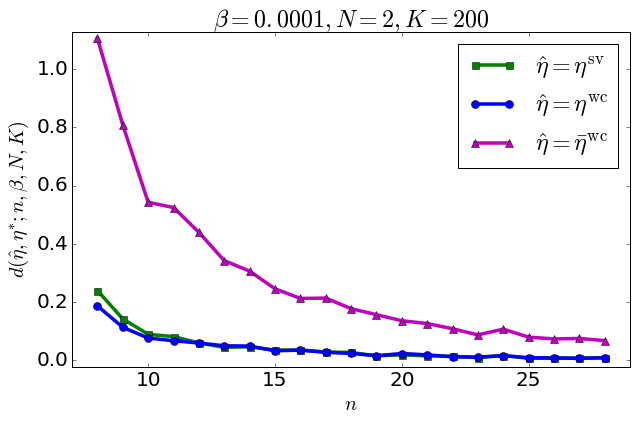

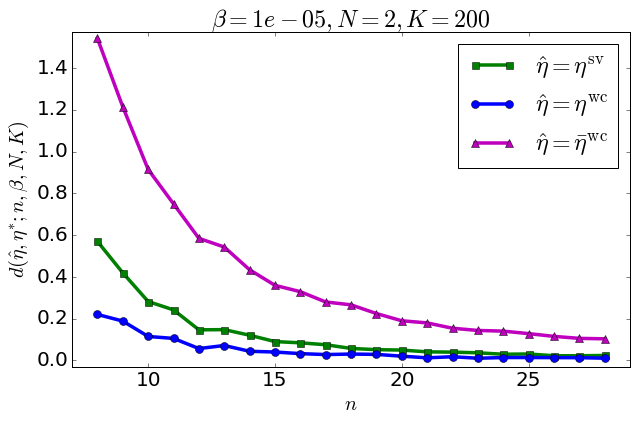

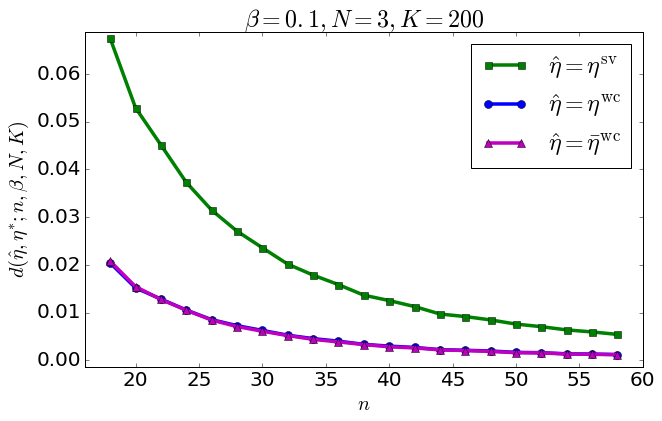

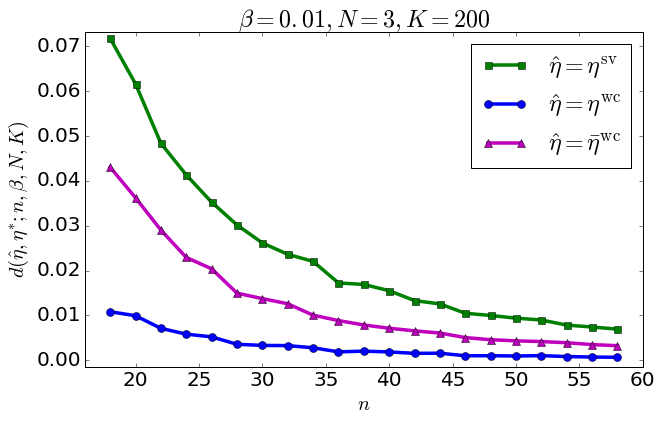

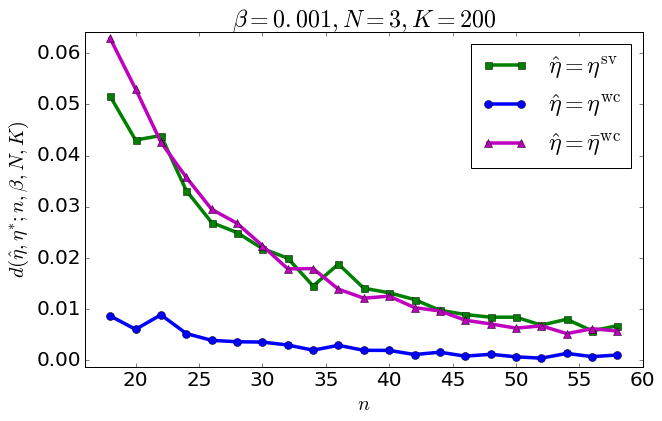

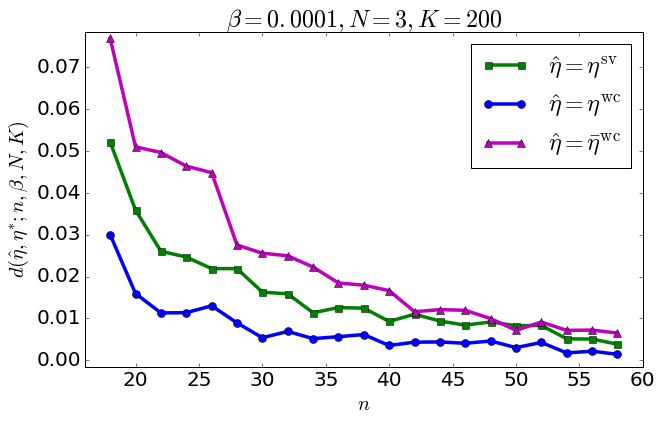

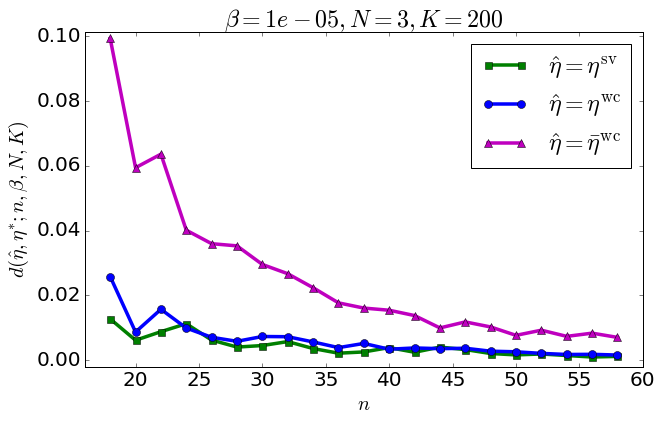

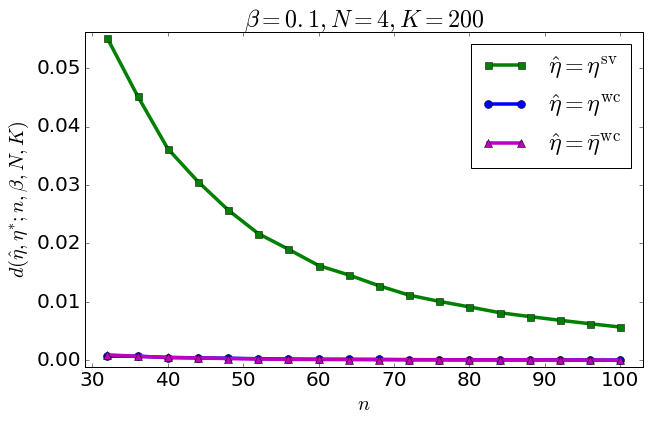

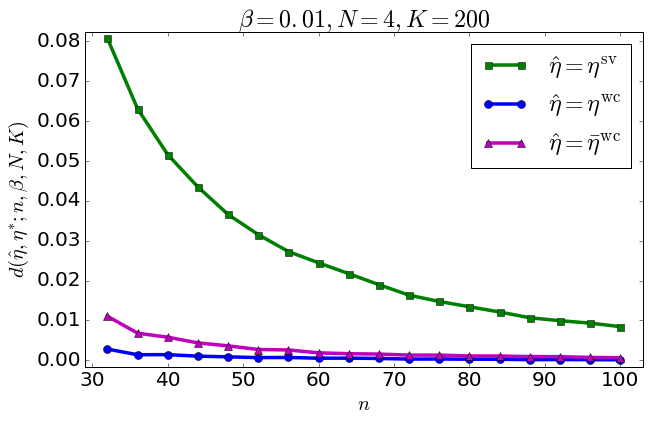

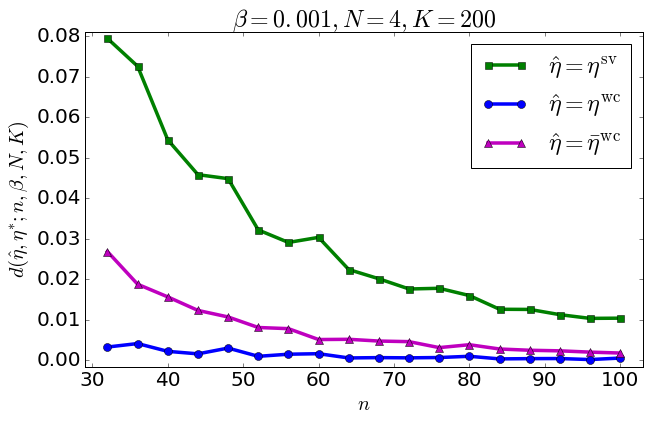

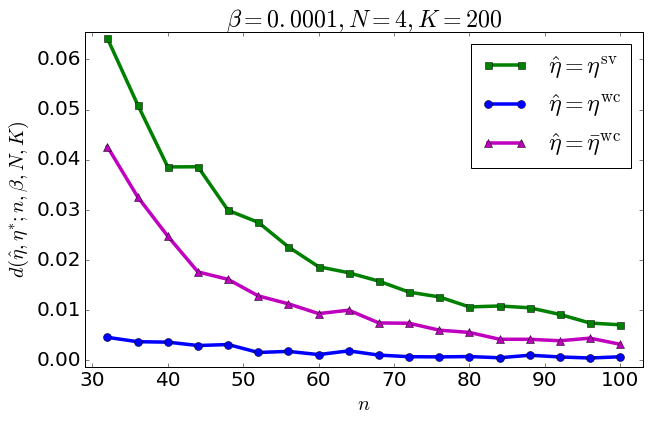

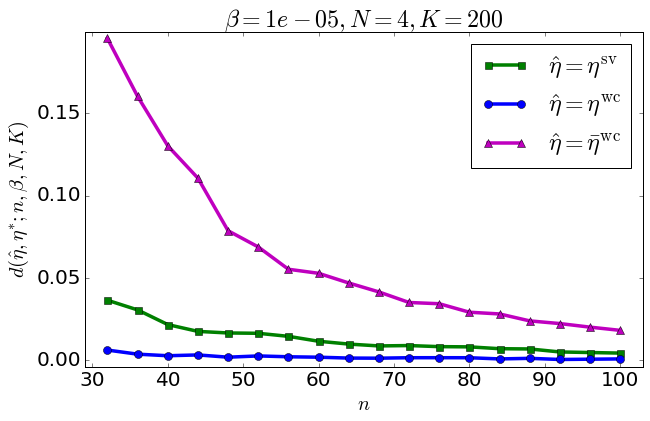

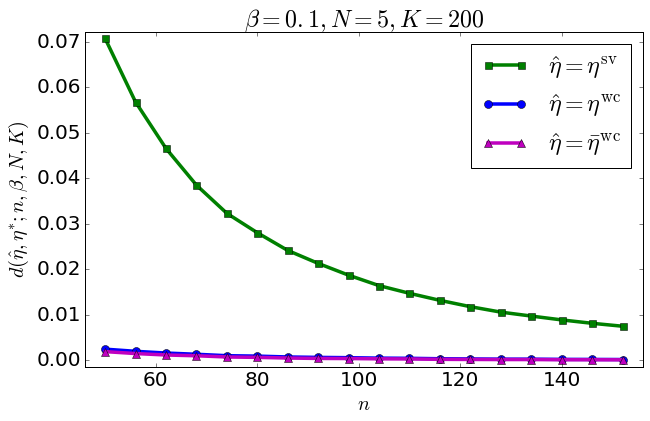

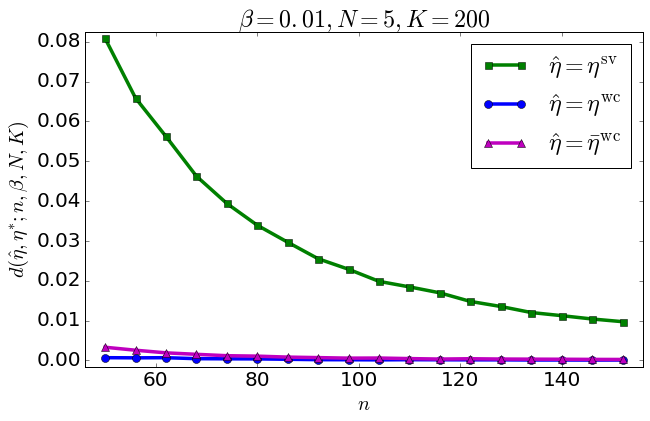

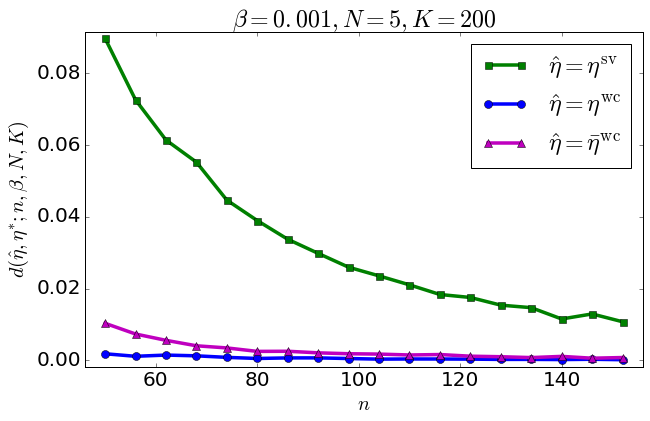

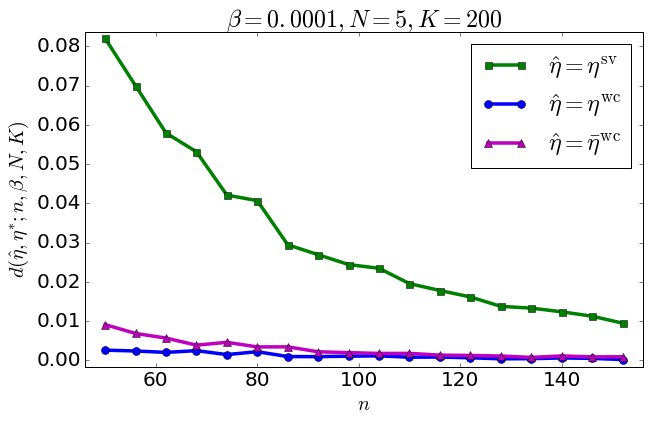

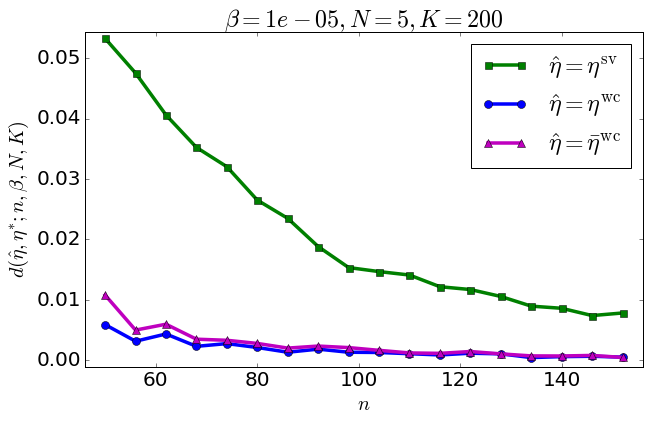

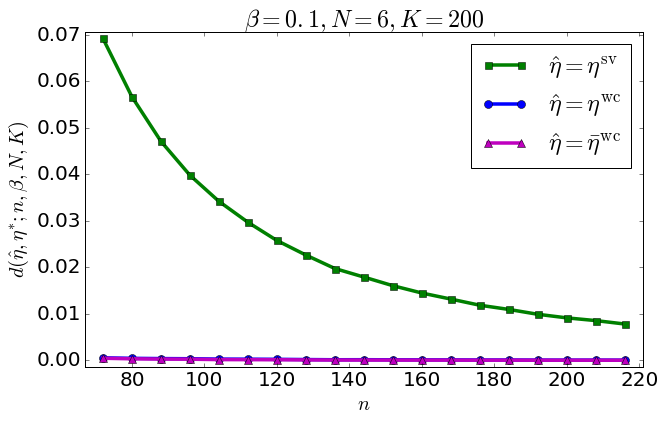

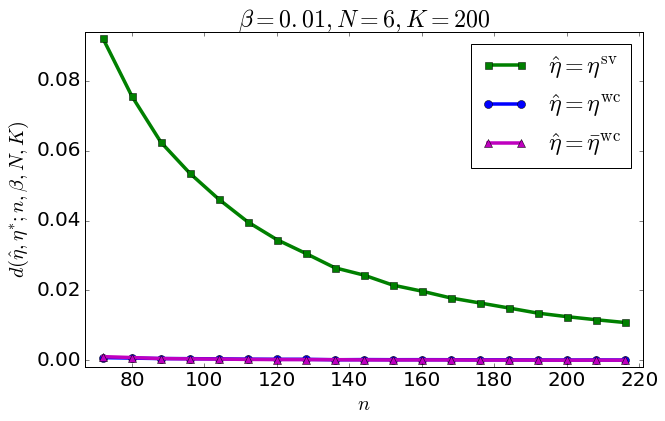

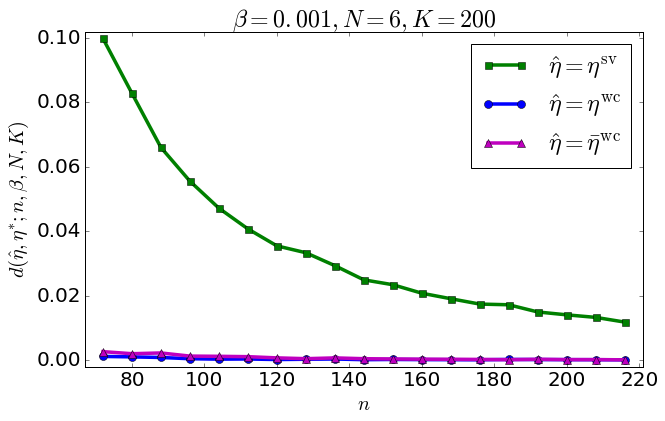

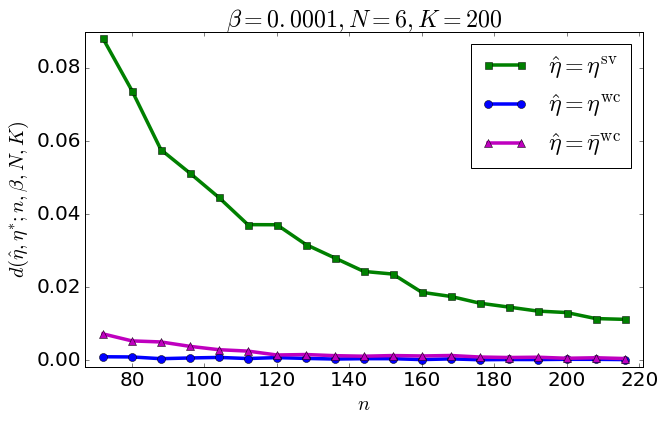

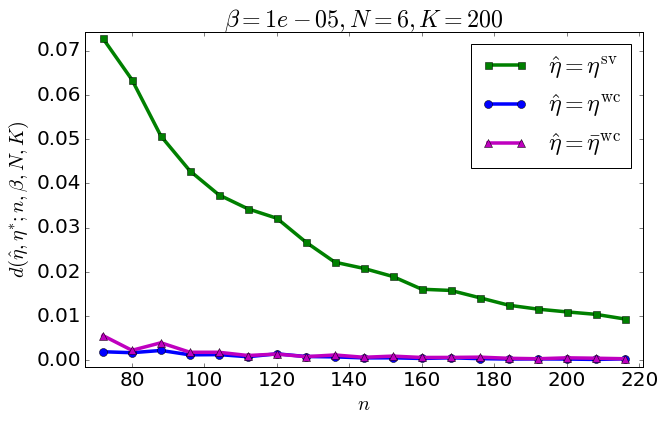

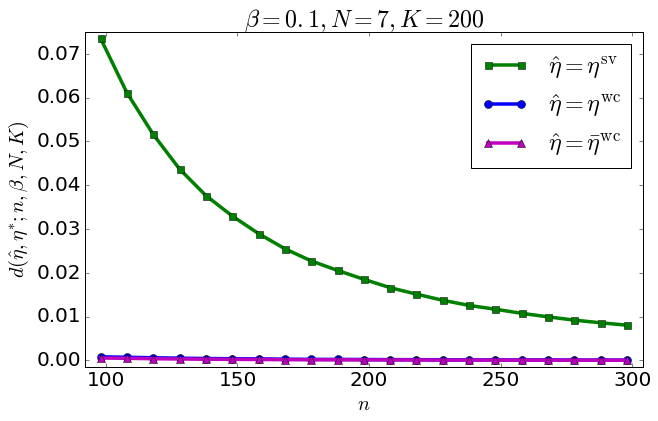

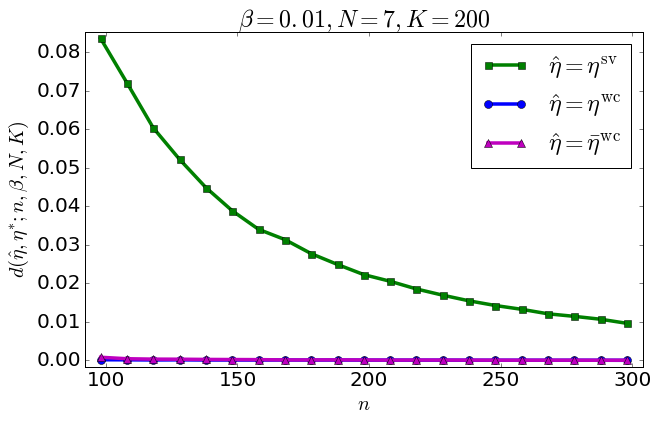

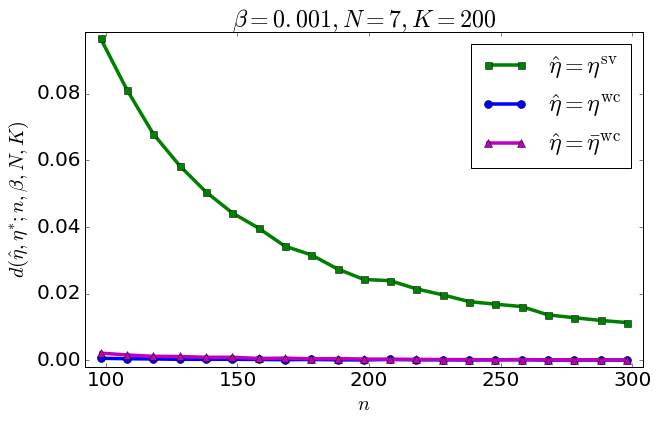

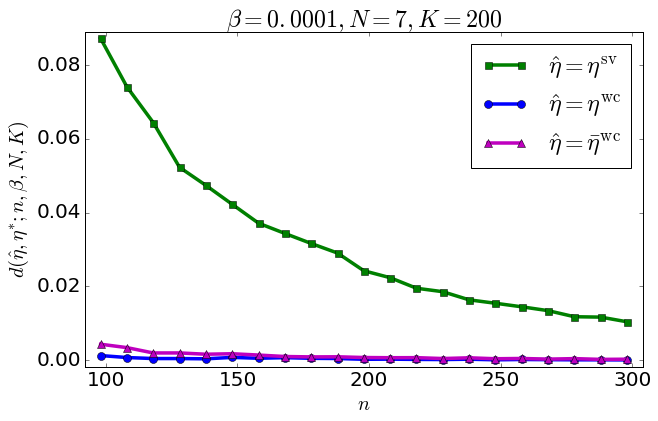

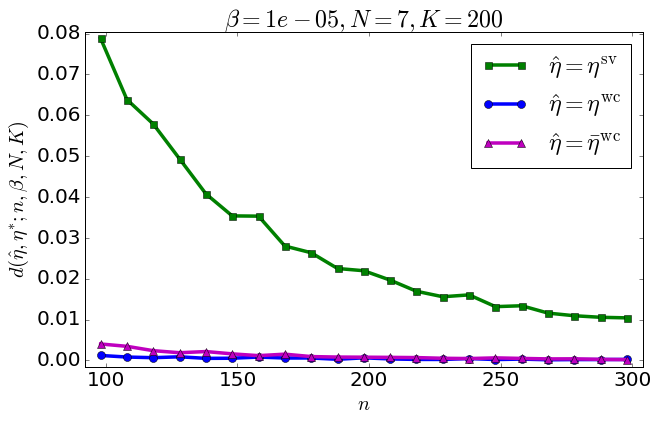

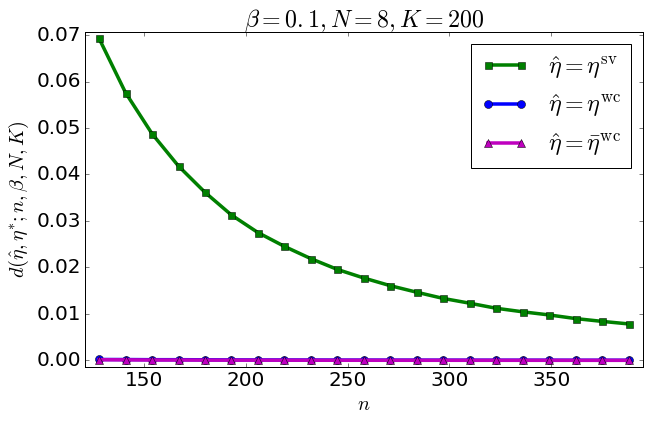

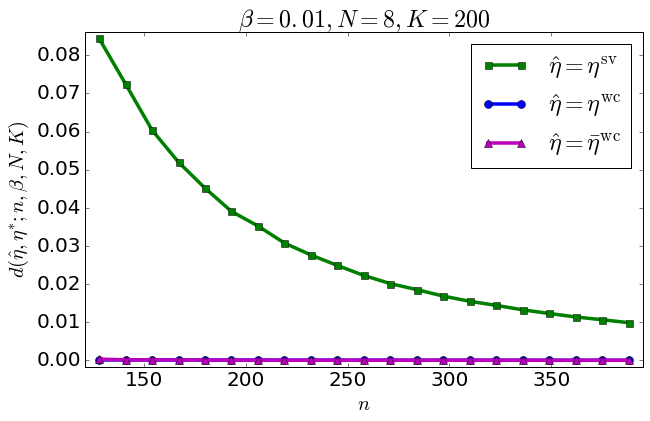

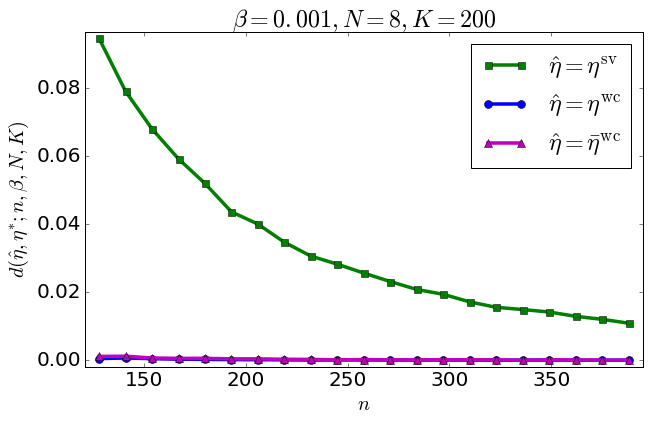

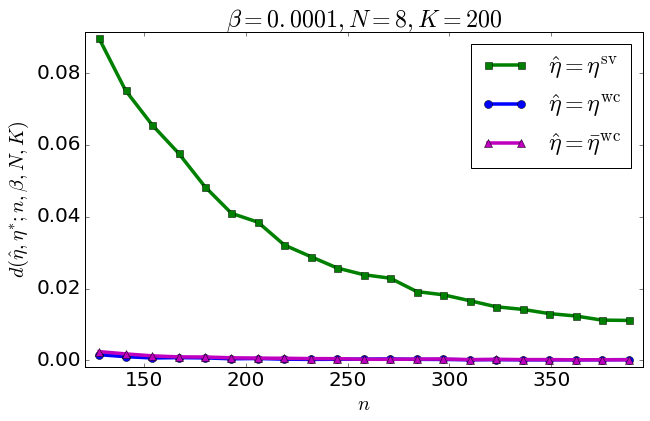

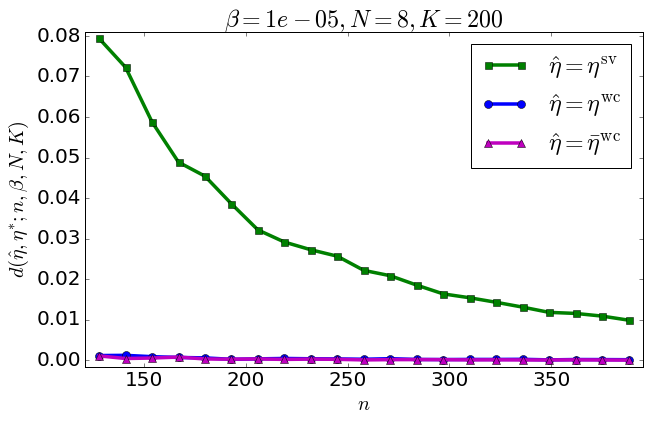

In [8]:
import matplotlib.pyplot as plt
import pylab
from pylab import *

for N in N_list:
    for beta in beta_list:
        
        font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

        plt.figure(figsize=(10, 6))

        matplotlib.rc('font', **font)

        n_list = save_data_dict[(N, beta, 1)]['n_range']

        err_sv_avg, = plt.plot(n_list, [err_sv_dict[(n, beta, N)] for n in n_list], "g-s", linewidth=3.5, \
                               markersize=7)
        err_wc_1_avg, = plt.plot(n_list, [err_wc_1_dict[(n, beta, N)] for n in n_list], "b-o", linewidth=3.5, \
                                markersize=8)
        err_wc_2_avg, = plt.plot(n_list, [err_wc_2_dict[(n, beta, N)] for n in n_list], "m-^", linewidth=3.5, \
                                markersize=8)

        plt.legend([err_sv_avg, err_wc_1_avg, err_wc_2_avg], [r"$\hat \eta = \eta^{\mathrm{sv}}$", \
                                                              r"$\hat \eta = \eta^{\mathrm{wc}}$", \
                                                              r"$\hat \eta = \bar \eta^{\mathrm{wc}}$"])
        plt.xlabel(r"$n$")
        plt.ylabel(r"$d({\hat \eta ,\eta^{*};n,\beta,N,K})$")
        plt.title(r"$\beta = %s, N = %s, K = 200$"%(beta, N))
        pylab.xlim(np.amin(n_list) - (N - 1), np.amax(n_list) + (N - 1))
        # plt.xticks(N_list)
        y_max = np.amax([np.amax([err_sv_dict[(n, beta, N)] for n in n_list]), \
                         np.amax([err_wc_1_dict[(n, beta, N)] for n in n_list]), \
                         np.amax([err_wc_2_dict[(n, beta, N)] for n in n_list])])
        pylab.ylim(-0.02 * y_max, 1.02 * y_max)

        savefig(dir_1 + 'err_comp_mb_%s_%s.eps'%(N, beta))

        plt.show()

In [ ]:
range(2 * N * N, 6 * N * N + 5, int(0.2 * N * N + 1))


